## Laporan Proyek Machine Learning - Achmad Fariz Rizky Yanuar

## Domain Proyek

Seiring dengan meningkatnya kebutuhan masyarakat terhadap pinjaman keuangan, lembaga keuangan menghadapi tantangan besar dalam menyaring dan mengevaluasi aplikasi pinjaman secara efektif. Proses peninjauan manual terhadap aplikasi pinjaman sering kali membutuhkan waktu yang lama dan berpotensi menimbulkan bias, sehingga dibutuhkan solusi berbasis teknologi untuk meningkatkan efisiensi dan akurasi proses evaluasi.

Proyek ini bertujuan untuk membangun model prediktif menggunakan machine learning guna menentukan apakah suatu aplikasi pinjaman layak disetujui atau tidak. Dengan mengandalkan kombinasi data terstruktur seperti pendapatan, rasio utang terhadap pendapatan, dan skor kredit, serta data tidak terstruktur berupa narasi dari pemohon, model ini diharapkan dapat membantu lembaga keuangan mengambil keputusan secara cepat dan tepat.

Proyek ini juga merujuk pada penelitian terdahulu yang dilakukan oleh Viswanatha et al. (2023) yang mengimplementasikan beberapa algoritma machine learning untuk prediksi persetujuan pinjaman dengan hasil akurasi tertinggi sebesar 83,73% menggunakan algoritma Naive Bayes. Penelitian ini menggunakan fitur-fitur serupa seperti pendapatan dan status pekerjaan, sehingga menjadi referensi yang relevan dalam pengembangan proyek ini.

**Referensi:**

**Prediction of loan approval in banks using machine learning approach**. Viswanatha, V., Ramachandra, A. C., Vishwas, K. N., & Adithya, G. (2023), *International Journal of Engineering and Management Research, 13(4), 7-19*.

**Batasan Masalah:**

Dalam proyek ini, hanya data terstruktur yang digunakan untuk membangun model prediksi persetujuan pinjaman. Fokus model sepenuhnya pada variabel numerik dan kategorikal seperti pendapatan, skor kredit, jumlah pinjaman, rasio utang terhadap pendapatan, dan status pekerjaan.

## Business Understanding

Permintaan pinjaman semakin meningkat, namun lembaga keuangan menghadapi tantangan dalam mengevaluasi kelayakan peminjam secara efisien dan akurat. Keputusan yang salah dapat menyebabkan kerugian finansial atau kehilangan peluang bisnis.

Machine learning dapat digunakan untuk membangun sistem prediktif berbasis data historis guna membantu proses persetujuan pinjaman secara otomatis dan tepat sasaran.

#### **Problem Statements**
- Bagaimana memanfaatkan data terstruktur untuk memprediksi apakah permohonan pinjaman disetujui?

- Algoritma machine learning apa yang paling efektif untuk memodelkan data persetujuan pinjaman?

#### **Goals**
- Mengembangkan model klasifikasi untuk memprediksi persetujuan pinjaman berdasarkan fitur finansial.

- Menentukan model terbaik di antara Random Forest, Naive Bayes, Decision Tree, dan KNN menggunakan metrik evaluasi.

#### **Solution Statement**
- Membangun model klasifikasi menggunakan:

  - Random Forest

  - Naive Bayes

  - Decision Tree

  - K-Nearest Neighbors (KNN)

- Melakukan preprocessing data terstruktur (encoding dan normalisasi).

- Evaluasi model menggunakan akurasi, precision, recall, dan F1-score. Pemilihan model terbaik menggunakan akurasi--merujuk pada penelitian yang menjadi refrensi proyek ini.

## Data Understanding

Dataset yang digunakan dalam proyek ini adalah dataset yang men-*support* ML Loan-Solutions Elite project, sebuah model yang dirancang untuk memprediksi persetujuan pinjaman berdasarkan data keuangan pemohon. Dataset ini terdiri dari data terstruktur dan tersedia dalam format CSV. Dataset dapat diakses melalui Kaggle: https://www.kaggle.com/datasets/abhishekmishra08/loan-approval-datasets.

Dataset tersedia dalam format CSV dan memiliki 7 kolom:

- Text (string): Deskripsi alasan pengajuan pinjaman. (Tidak digunakan dalam proyek ini)

- Income (float): Total pendapatan pemohon.

- Credit_Score (integer): Skor kredit pemohon.

- Loan_Amount (float): Jumlah pinjaman yang diajukan.

- DTI_Ratio (float): Debt-to-Income Ratio, yaitu rasio antara utang dan pendapatan.

- Employment_Status (categorical): Status pekerjaan pemohon (misalnya employed, unemployed).

- Approval (categorical - target): Status pengajuan pinjaman (Approved atau Rejected).

Catatan:
Fitur Text tidak digunakan dalam proyek ini untuk menjaga fokus pada pemodelan berbasis data numerik dan kategorikal.

#### EDA

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/loan_data.csv')

In [37]:
df.head() # Preview dataset

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved


In [38]:
df.isnull().sum()

,0
Text,0
Income,0
Credit_Score,0
Loan_Amount,0
DTI_Ratio,0
Employment_Status,0
Approval,0


Tidak ada ditemukan null values

In [39]:
df.count()

,0
Text,24000
Income,24000
Credit_Score,24000
Loan_Amount,24000
DTI_Ratio,24000
Employment_Status,24000
Approval,24000


Terdapat 24.000 samples

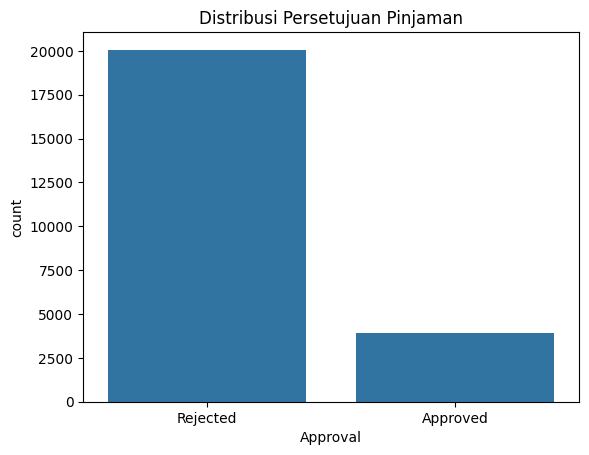

Distribusi Approval:


,count
Approval,
Rejected,20067
Approved,3933


In [40]:
# Distribusi target
sns.countplot(x='Approval', data=df)
plt.title('Distribusi Persetujuan Pinjaman')
plt.show()

# Jumlah persetujuan pinjaman
print("Distribusi Approval:")
df['Approval'].value_counts()

Grafik ini menunjukkan bahwa jumlah permohonan pinjaman yang ditolak jauh lebih banyak dibandingkan yang disetujui. Hal ini mengindikasikan ketidakseimbangan kelas dalam data, yang dapat memengaruhi performa model klasifikasi jika tidak ditangani dengan tepat.

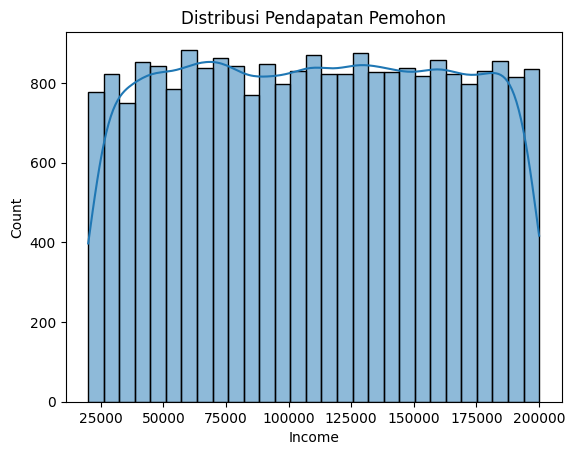

In [41]:
# Distribusi pendapatan
sns.histplot(df['Income'], kde=True)
plt.title('Distribusi Pendapatan Pemohon')
plt.show()

Histogram ini memperlihatkan sebaran pendapatan pemohon pinjaman. Terlihat bahwa pendapatan tersebar cukup merata di seluruh rentang nilai, tanpa adanya konsentrasi ekstrem pada level tertentu.

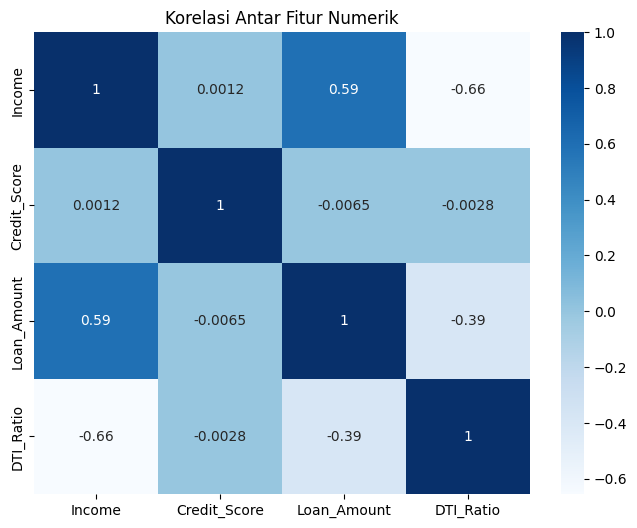

In [42]:
# Korelasi antar fitur numerik
plt.figure(figsize=(8,6))
numerical_cols = ['Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio']
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='Blues')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

Heatmap ini menampilkan korelasi antar fitur numerik. Income berkorelasi positif dengan Loan Amount, namun negatif dengan DTI Ratio. Ini masuk akal karena pendapatan yang lebih tinggi umumnya mampu menurunkan rasio utang terhadap pendapatan.



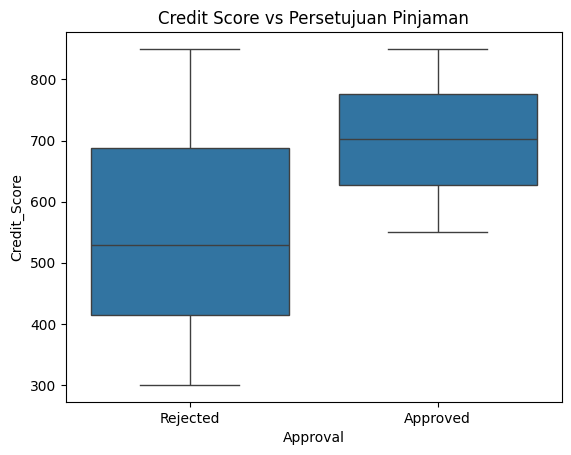

In [43]:
# Boxplot Credit Score terhadap Approval
sns.boxplot(x='Approval', y='Credit_Score', data=df)
plt.title('Credit Score vs Persetujuan Pinjaman')
plt.show()

Boxplot ini menunjukkan bahwa pemohon dengan skor kredit yang disetujui cenderung memiliki skor lebih tinggi dibandingkan yang ditolak. Artinya, skor kredit menjadi indikator penting dalam menentukan kelayakan pinjaman.

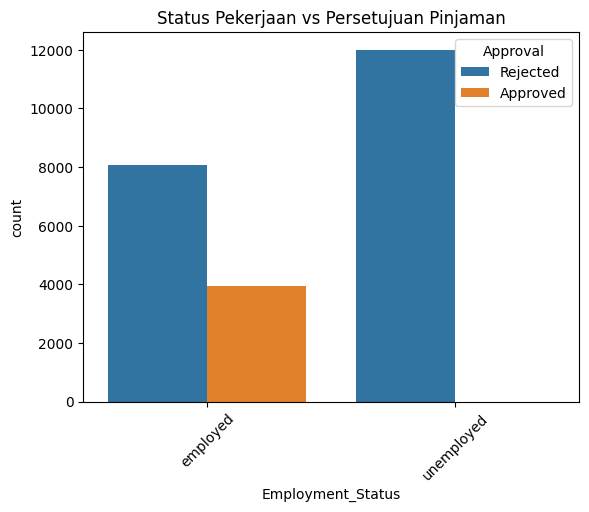

Distribusi Employment Status berdasarkan Approval:


Approval,Approved,Rejected
Employment_Status,,
employed,3933,8060
unemployed,0,12007


In [44]:
# Perbandingan status pekerjaan
sns.countplot(x='Employment_Status', hue='Approval', data=df)
plt.title('Status Pekerjaan vs Persetujuan Pinjaman')
plt.xticks(rotation=45)
plt.show()

# Crosstab antara Employment_Status dan Approval
employment_approval_counts = pd.crosstab(df['Employment_Status'], df['Approval'])
print("Distribusi Employment Status berdasarkan Approval:")
employment_approval_counts

Grafik ini menggambarkan hubungan antara status pekerjaan dan hasil persetujuan pinjaman. Terlihat bahwa sebagian besar pemohon yang menganggur ditolak, sedangkan yang bekerja memiliki kemungkinan lebih tinggi untuk disetujui.

### Data Preperation

Pada tahap ini kita akan:
- Menghapus kolom/feature `Teks`
- Encode kolom kategori dan target
- Pisahkan fitur dan target
- Standardisasi fitur numerik
- Data splitting 80/20

In [45]:
# Menghapus kolom teks yang tidak digunakan
df = df.drop(columns=['Text'])

Kolom `Teks` tidak digunakan karena fokus model hanya pada fitur numerik dan kategorikal, sehingga dihapus untuk menyederhanakan input model.

In [46]:
# Encode kolom kategori dan target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Employment_Status'] = le.fit_transform(df['Employment_Status'])
df['Approval'] = le.fit_transform(df['Approval'])  # Approved=1, Rejected=0

Label encoding diperlukan agar model dapat memproses data kategorikal seperti status pekerjaan dan target (persetujuan pinjaman), karena model hanya dapat bekerja dengan nilai numerik.

In [47]:
# Pisahkan fitur dan target
X = df.drop(columns='Approval')
y = df['Approval']

Pemisahan fitur (X) dan target (y) diperlukan untuk melatih model hanya pada fitur input, tanpa bocoran dari label target.

In [48]:
# Standardisasi fitur numerik
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Standardisasi digunakan agar fitur numerik berada pada skala yang sama, yang penting untuk algoritma yang sensitif terhadap skala seperti SVM dan Logistic Regression.

In [49]:
# Split data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Data dibagi menjadi data latih dan data uji agar kita bisa mengukur performa model terhadap data yang belum pernah dilihat sebelumnya, sehingga hasil evaluasi lebih adil dan realistis.

# Modelling

Tahap ini melibatkan pembangunan beberapa model klasifikasi untuk memprediksi persetujuan pinjaman. Setiap model memiliki karakteristik dan cara kerja yang berbeda.

#### **Model 1: Decision Tree**



- **Cara kerja**:
Decision Tree membagi data berdasarkan fitur yang memberikan informasi paling tinggi (dengan pengukuran seperti Gini atau Entropy). Setiap cabang merepresentasikan keputusan hingga mencapai leaf node (output prediksi).

- **Parameter**:

`criterion='gini'`: Menggunakan indeks Gini untuk menentukan pemisahan terbaik.

`random_state=42`: Untuk menjaga hasil tetap konsisten.

In [50]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

- **Kelebihan**:

Mudah dipahami dan divisualisasikan.

Tidak memerlukan normalisasi data.

- **Kekurangan**:

Rentan overfitting jika pohon terlalu dalam.

#### **Model 2: Random Forest**

- **Cara kerja:**
Random Forest membangun banyak Decision Tree dari subset data acak dan menggabungkan hasilnya (mayoritas voting) untuk meningkatkan akurasi dan mengurangi overfitting.

- **Parameter**:

`n_estimators=100`: Jumlah pohon dalam forest.

`random_state=42`: Untuk reprodusibilitas.

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- **Kelebihan**:

Lebih stabil dan akurat dibanding Decision Tree tunggal.

Mengurangi overfitting melalui averaging.

- **Kekurangan**:

Lebih lambat saat inferensi.

Sulit untuk interpretasi secara langsung.

#### **Model 3: Naive Bayes (GaussianNB)**

- **Cara kerja**:
Naive Bayes menggunakan Teorema Bayes dengan asumsi bahwa semua fitur saling independen. GaussianNB cocok untuk data numerik yang terdistribusi normal.

- **Parameter**:
Model ini tidak membutuhkan banyak tuning parameter secara eksplisit.

In [52]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

- **Kelebihan**:

Cepat dan efisien untuk dataset besar.

Cocok untuk baseline model.

- **Kekurangan**:

Asumsi independensi sering tidak realistis.

Tidak bekerja baik jika fitur sangat bergantung satu sama lain.

#### **Model 4: K-Nearest Neighbors (KNN)**

- **Cara kerja**:
KNN mengklasifikasikan data berdasarkan mayoritas label dari k data terdekat dalam ruang fitur. Jarak biasanya dihitung menggunakan Euclidean Distance.

- **Parameter**:

- `n_neighbors=5`: Menggunakan 5 tetangga terdekat untuk voting.

- `metric='minkowski`': Default untuk menghitung Euclidean Distance.

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier()

- **Kelebihan**:

Sederhana dan tidak memerlukan pelatihan eksplisit.

Cocok untuk dataset kecil.

- **Kekurangan**:

Tidak efisien untuk dataset besar.

Sensitif terhadap skala fitur (perlu normalisasi).

# Evaluation

Tahap ini berfokus pada evaluasi performa dari setiap model klasifikasi yang telah dibuat sebelumnya. Karena kita menangani masalah klasifikasi (approval/disapproval), maka metrik evaluasi yang digunakan meliputi:

**Metrik Evaluasi yang Digunakan**:
- Accuracy: Persentase prediksi yang benar dari seluruh data.

Accuracy = (TP + TN) / (TP + TN + FP + FN)

- Precision: Proporsi prediksi positif yang benar-benar positif.

Precision = TP / (TP + FP)

- Recall: Proporsi kasus positif yang berhasil terprediksi dengan benar.

Recall = TP / (TP + FN)

- F1 Score: Harmonic mean dari Precision dan Recall, berguna saat data agak imbalance.

F1 Score = 2 x ((Precision * Recall) / (Precision + Recall))


In [54]:
from sklearn.metrics import classification_report

models = {'Decision Tree': dt,
          'Random Forest': rf,
          'Naive Bayes': nb,
          'KNN': knn}

for name, model in models.items():
    print(f"\n{name}:\n")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))



Decision Tree:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       753
           1       1.00      1.00      1.00      4047

    accuracy                           1.00      4800
   macro avg       0.99      0.99      0.99      4800
weighted avg       1.00      1.00      1.00      4800


Random Forest:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       753
           1       1.00      1.00      1.00      4047

    accuracy                           1.00      4800
   macro avg       1.00      1.00      1.00      4800
weighted avg       1.00      1.00      1.00      4800


Naive Bayes:

              precision    recall  f1-score   support

           0       0.36      1.00      0.53       753
           1       1.00      0.67      0.80      4047

    accuracy                           0.72      4800
   macro avg       0.68      0.84      0.67      4800
weighted avg       0.90  

Untuk mengevaluasi kinerja model klasifikasi, digunakan metrik accuracy, precision, recall, dan F1-score. Meskipun data tidak seimbang (20067 Rejected vs 3933 Approved), metrik accuracy tetap dijadikan dasar pemilihan model terbaik karena mengacu pada referensi penelitian sebelumnya.

Berikut ringkasan hasil evaluasi keempat model:

1. **Decision Tree** menunjukkan akurasi mendekati sempurna (100%), dengan performa yang sangat baik di kedua kelas.

2. **Random Forest** juga memberikan akurasi 100%, dengan precision, recall, dan F1-score yang tinggi dan merata di semua kelas.

3. **Naive Bayes** memiliki akurasi jauh lebih rendah (72%), terutama karena kesulitan dalam mengenali kelas Approved secara akurat.

4. **KNN** menunjukkan akurasi tinggi (99%) dengan performa yang cukup stabil dan seimbang antar kelas.

Model yang mendapatkan akurasi tertinggi adalah Decision Tree dan Random Forest, yang keduanya mencatatkan performa sempurna di data uji.

Namun, karena Decision Tree cenderung overfitting terhadap data latih dan kurang stabil terhadap perubahan data, **maka Random Forest dipilih sebagai model terbaik.**

**Hubungan dengan Business Understanding:**

Evaluasi model menunjukkan bahwa proyek ini berhasil menjawab semua problem statement dan mencapai goals yang telah ditetapkan:

- Problem Statement 1: Model berhasil memanfaatkan data terstruktur untuk memprediksi apakah pengajuan pinjaman akan disetujui atau ditolak. Keakuratan tinggi dari Random Forest menunjukkan bahwa data finansial dapat digunakan secara efektif untuk prediksi ini.

- Problem Statement 2: Model terbaik (Random Forest) telah teridentifikasi berdasarkan metrik evaluasi, menjawab pertanyaan mengenai algoritma machine learning yang paling efektif dalam konteks ini.

- Goals: Model klasifikasi berhasil dikembangkan dan dibandingkan. Hasil evaluasi menunjukkan bahwa tujuan menentukan model terbaik berdasarkan akurasi telah tercapai, dengan Random Forest sebagai kandidat terkuat.

- Solution Statement: Seluruh solusi yang dirancang—mulai dari preprocessing (encoding & normalisasi), pemilihan algoritma, hingga evaluasi berbasis metrik—telah diimplementasikan dan terbukti efektif. Evaluasi menyeluruh juga mendukung penggunaan accuracy sebagai metrik utama.

